In [9]:
import pandas as pd
from functools import reduce

In [10]:
GDP = pd.read_csv("GDP_data.csv")
print(GDP.head())
GDP = GDP.drop(GDP.index[:187])
OriginalGDP = 85917
GDP = GDP.rename(columns = {"Gross Domestic Product: Quarter on Quarter growth: CVM SA %":"Change"})
GDP['Change'] = pd.to_numeric(GDP['Change'], errors='coerce')
Change = [1 + (num / 100) for num in GDP["Change"]]
def multiply(x, y):
    return x * y
YearGDP = []
GDPnum = 0k
for i in range(0, len(GDP), 4):
    GDPnum = 0
    if  i == 0:
        YearGDP.append(OriginalGDP)
    else:
        YearGDP.append(YearGDP[-1] * reduce(multiply, Change))
    GDPnum += 1
GDP_t = pd.DataFrame({"Year":[i for i in range(2000, 2024)], "GDP Growth":YearGDP})
GDP_t = GDP_t.drop(GDP_t.index[-2:])
GDP_t = GDP_t.set_index("Year")
GDP.head()

               Title  \
0               CDID   
1  Source dataset ID   
2            PreUnit   
3               Unit   
4       Release date   

  Gross Domestic Product: Quarter on Quarter growth: CVM SA %  
0                                               IHYQ           
1                                                PN2           
2                                                NaN           
3                                                  %           
4                                         10-05-2024           


,Title,Change
187,2000 Q2,0.7
188,2000 Q3,0.6
189,2000 Q4,0.6
190,2001 Q1,0.9
191,2001 Q2,0.4


In [11]:
POP_t = pd.read_csv("POPt_data.csv")
POP_t = POP_t.drop(POP_t.index[:36])
POP_t = POP_t.drop(POP_t.index[-1])
POP_t = POP_t.rename(columns={"Title":"Year"})
POP_t = POP_t.set_index("Year")
POP_t

,United Kingdom population mid-year estimate
Year,
2000,58886100
2001,59113000
2002,59365700
2003,59636700
2004,59950400
2005,60413300
2006,60827100
2007,61319100
2008,61823800


In [12]:
EI = pd.read_csv("Energy_Data.csv")
EI = EI.drop(columns=["total final energy consumption in United Kingdom", "Units"])
EI = EI.fillna(0)
TotVal = []
for i in range(2000, 2022):
    TotVal.append(sum(EI["Value"][EI["Year"] == i]))
    EI = EI[EI["Year"] != i]
EI_t = pd.DataFrame({"Year": [i for i in range(2000, 2022)], "Value":[a / b for a, b in zip(TotVal, [OriginalGDP * reduce(lambda x, y: x * y, GDP_t["GDP Growth"][:z]) for z in range(2000, 2022)])]})
EI_t = EI_t.set_index("Year")

In [13]:
REN_t = pd.DataFrame({"Year":[i for i in range(2000, 2024)], "Renewable":[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10.7, 14.2, 14.5, 20.3, 27.6, 31.5, 37.5, 33.7, 37.5, 39.5], "Fossil":[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 58.1, 50.8, 49.9, 44.7, 42.4, 40.1, 35.1, 38.6, 39.7, 32.2]})
REN_t = REN_t.drop(REN_t.index[-2:])
REN_t = REN_t.set_index("Year")
REN_t

,Renewable,Fossil
Year,,
2000,0.0,0.0
2001,0.0,0.0
2002,0.0,0.0
2003,0.0,0.0
2004,0.0,0.0
2005,0.0,0.0
2006,0.0,0.0
2007,0.0,0.0
2008,0.0,0.0


In [14]:
IE_t = pd.read_csv("Industry.csv")
#there seems to be a problem with the file itself.

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 8


In [15]:
IND_t = pd.read_excel("IndustrialActivity.xlsx", sheet_name="Table 1")
IND_t = IND_t.drop(columns=["45 : Motor trades", "46 : Wholesale", "47 : Retail", "55-56 : Accommodation & food services", "58-63 : Information & communication", "64-66 : Finance & insurance", "69-75 : Professional, scientific & technical", "77-82 : Business administration & support services", "84 : Public administration & defence", "85 : Education", "86-88 : Health", "90-99 : Arts, entertainment, recreation & other services", "Total"])
columns = IND_t.columns.tolist()
IND_t["Total"] = IND_t.iloc[:, 1:].sum(axis=1)
IND_t

,Unnamed: 0,"01-03 : Agriculture, forestry & fishing",05-39 : Production,41-43 : Construction,49-53 : Transport & Storage (inc postal),68 : Property,Total
0,K02000001 : UNITED KINGDOM,141390,151710,377585,128600,113785,913070
1,K03000001 : GREAT BRITAIN,122845,146300,366385,125555,111345,872430
2,K04000001 : ENGLAND AND WALES,105725,135855,344395,118965,105045,809985
3,E92000001 : ENGLAND,92065,129365,329920,113500,101765,766615
4,E12000001 : NORTH EAST,3830,4625,10195,3640,2555,24845
...,...,...,...,...,...,...,...
417,N09000006 : Fermanagh and Omagh,3840,480,1165,205,195,5885
418,N09000007 : Lisburn and Castlereagh,640,410,720,235,185,2190
419,N09000008 : Mid and East Antrim,1420,380,660,155,135,2750
420,N09000009 : Mid Ulster,3310,935,1620,355,215,6435


In [16]:
Y = pd.read_csv("Cumulative C02 emissions Pivot Table.csv")
Year = Y.iloc[0].tolist()[51:-1]
Canada = Y.iloc[2].tolist()[51:-1]
EU = Y.iloc[3].tolist()[51:-1]
India = Y.iloc[4].tolist()[51:-1]
UK = Y.iloc[5].tolist()[51:-1]
US = Y.iloc[6].tolist()[51:-1]
Y_t = pd.DataFrame(data={"Year":Year, "Canada":Canada, "European Union (27)":EU, "India":India, "United Kingdom":UK, "Unites States":US})
Y_t = Y_t.set_index("Year")
Y_t

,Canada,European Union (27),India,United Kingdom,Unites States
Year,,,,,
2000.0,2.218888e+10,7.572400e+10,2.233140e+11,1.891345e+10,6.848298e+10
2001.0,2.274803e+10,7.945251e+10,2.269720e+11,1.990442e+10,6.906095e+10
2002.0,2.331240e+10,8.355556e+10,2.306310e+11,2.092609e+10,6.962123e+10
2003.0,2.389383e+10,8.839668e+10,2.343740e+11,2.198524e+10,7.019285e+10
2004.0,2.447352e+10,9.361402e+10,2.381280e+11,2.311034e+10,7.076627e+10
2005.0,2.504828e+10,9.949616e+10,2.418630e+11,2.429602e+10,7.133662e+10
2006.0,2.561687e+10,1.059910e+11,2.456070e+11,2.558850e+10,7.190446e+10
2007.0,2.621062e+10,1.129740e+11,2.493160e+11,2.698101e+10,7.246402e+10
2008.0,2.678743e+10,1.204760e+11,2.529400e+11,2.847044e+10,7.300896e+10


Model

In [17]:
df = pd.concat([Y_t, GDP_t, POP_t, EI_t, REN_t], axis=0, ignore_index = False)
df

,Canada,European Union (27),India,United Kingdom,Unites States,GDP Growth,United Kingdom population mid-year estimate,Value,Renewable,Fossil
Year,,,,,,,,,,
2000.0,2.218888e+10,7.572400e+10,2.233140e+11,1.891345e+10,6.848298e+10,NaN,NaN,NaN,NaN,NaN
2001.0,2.274803e+10,7.945251e+10,2.269720e+11,1.990442e+10,6.906095e+10,NaN,NaN,NaN,NaN,NaN
2002.0,2.331240e+10,8.355556e+10,2.306310e+11,2.092609e+10,6.962123e+10,NaN,NaN,NaN,NaN,NaN
2003.0,2.389383e+10,8.839668e+10,2.343740e+11,2.198524e+10,7.019285e+10,NaN,NaN,NaN,NaN,NaN
2004.0,2.447352e+10,9.361402e+10,2.381280e+11,2.311034e+10,7.076627e+10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3,44.7
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.6,42.4
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5,40.1


In [18]:
df = pd.merge(Y_t, GDP_t, on="Year")
df = pd.merge(df, EI_t, on="Year")
df = pd.merge(df, REN_t, on="Year")

In [19]:
df

,Canada,European Union (27),India,United Kingdom,Unites States,GDP Growth,Value,Renewable,Fossil
Year,,,,,,,,,
2000.0,2.218888e+10,7.572400e+10,2.233140e+11,1.891345e+10,6.848298e+10,8.591700e+04,9.783216e-143,0.0,0.0
2001.0,2.274803e+10,7.945251e+10,2.269720e+11,1.990442e+10,6.906095e+10,1.221813e+05,9.789436e-143,0.0,0.0
2002.0,2.331240e+10,8.355556e+10,2.306310e+11,2.092609e+10,6.962123e+10,1.737522e+05,9.602239e-143,0.0,0.0
2003.0,2.389383e+10,8.839668e+10,2.343740e+11,2.198524e+10,7.019285e+10,2.470904e+05,9.720775e-143,0.0,0.0
2004.0,2.447352e+10,9.361402e+10,2.381280e+11,2.311034e+10,7.076627e+10,3.513835e+05,9.755993e-143,0.0,0.0
2005.0,2.504828e+10,9.949616e+10,2.418630e+11,2.429602e+10,7.133662e+10,4.996972e+05,9.652438e-143,0.0,0.0
2006.0,2.561687e+10,1.059910e+11,2.456070e+11,2.558850e+10,7.190446e+10,7.106119e+05,9.475982e-143,0.0,0.0
2007.0,2.621062e+10,1.129740e+11,2.493160e+11,2.698101e+10,7.246402e+10,1.010551e+06,9.230670e-143,0.0,0.0
2008.0,2.678743e+10,1.204760e+11,2.529400e+11,2.847044e+10,7.300896e+10,1.437089e+06,9.171842e-143,0.0,0.0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()

In [21]:
correlation = df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

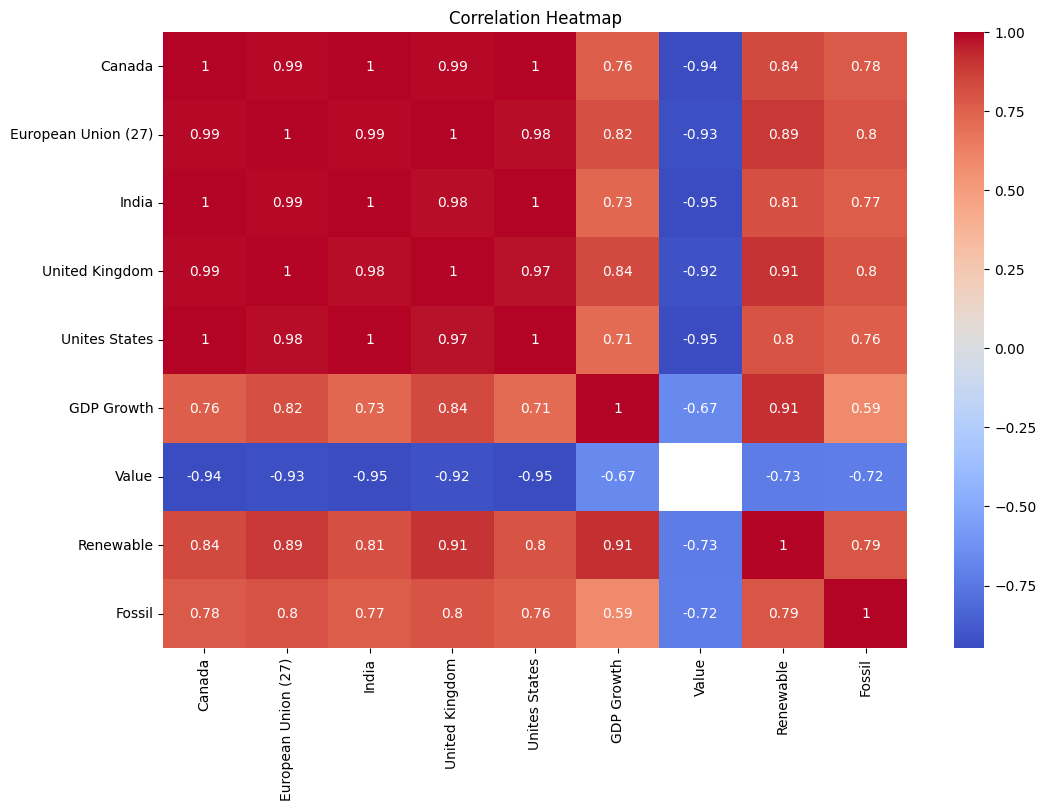

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Fossil')

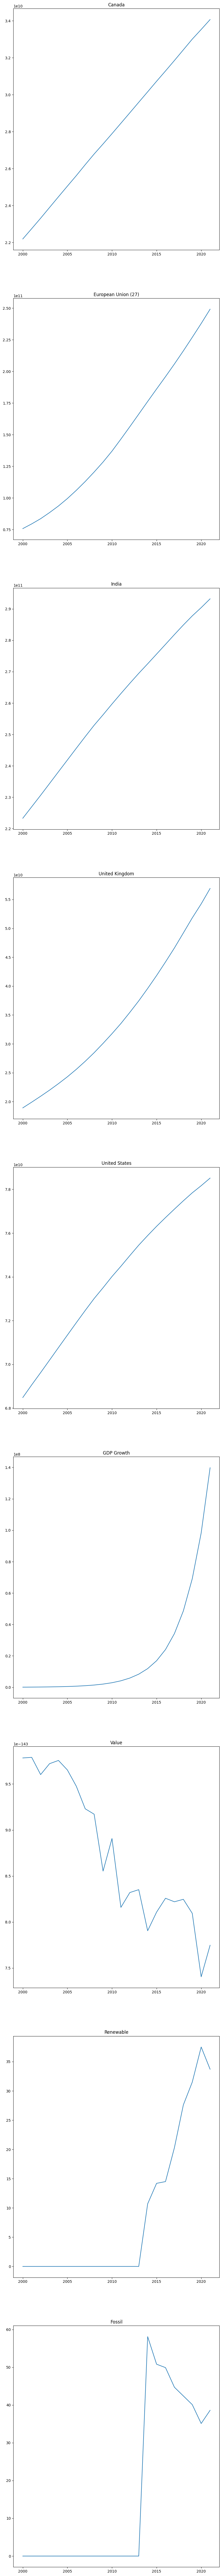

In [50]:
fig, ax = plt.subplots(9, 1, figsize = (10, 125))
ax[0].plot(df.index, df["Canada"])
ax[0].set_title("Canada")
ax[1].plot(df.index, df["European Union (27)"])
ax[1].set_title("European Union (27)")
ax[2].plot(df.index, df["India"])
ax[2].set_title("India")
ax[3].plot(df.index, df["United Kingdom"])
ax[3].set_title("United Kingdom")
ax[4].plot(df.index, df["Unites States"])
ax[4].set_title("United States")
ax[5].plot(df.index, df["GDP Growth"])
ax[5].set_title("GDP Growth")
ax[6].plot(df.index, df["Value"])
ax[6].set_title("Value")
ax[7].plot(df.index, df["Renewable"])
ax[7].set_title("Renewable")
ax[8].plot(df.index, df["Fossil"])
ax[8].set_title("Fossil")

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
lm = LinearRegression()

In [68]:
X = df.drop(columns="United Kingdom")
y = df["United Kingdom"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [69]:
lm.fit(X_train,y_train)

LinearRegression()

In [77]:
linearpredictions = lm.predict(X_test)

In [78]:
mse_linear = mean_squared_error(y_test, linearpredictions)
print("Linear: ", mse_linear)

Linear:  1.1115178059215492e+16


In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [103]:
pm2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [104]:
pm2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [105]:
polypredictions = pm2.predict(X_test)

In [109]:
mse_poly2 = mean_squared_error(y_test, polypredictions)
print("Poly: ", mse_poly2)

Poly:  1.3182006172037484e+16


In [110]:
pm5 = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())

In [111]:
pm5.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [113]:
polypredictions = pm5.predict(X_test)

In [114]:
mse_poly5 = mean_squared_error(y_test, polypredictions)
print("Poly 5: ", mse_poly5)

Poly 5:  6.923504770238211e+16


In [89]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE (Lasso Regression):", mse_lasso)

In [90]:
lassom = Lasso(alpha = 0.1)

In [91]:
lassom.fit(X_train, y_train)

Lasso(alpha=0.1)

In [92]:
lassopredictions = lassom.predict(X_test)

In [93]:
mse_lasso = mean_squared_error(y_test, lassopredictions)
print("Lasso: ", mse_lasso)

Lasso:  3.857465414369705e+16


In [80]:
from sklearn.linear_model import Ridge

In [86]:
rm = Ridge(alpha=1.0)

In [87]:
rm.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.9537e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [88]:
ridgepredictions = rm.predict(y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [115]:
print("Linear:", mse_linear)
print("Poly2:", mse_poly2)
print("Poly5:", mse_poly5)
print("Lasso:", mse_lasso)

Linear: 1.1115178059215492e+16
Poly2: 1.3182006172037484e+16
Poly5: 6.923504770238211e+16
Lasso: 3.857465414369705e+16
